# Introducción de paquetes principales

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import datetime as dt

Nota: El código ha sido diseñado con el objeto de ser reproducido en orden descendente. No se ha realizado ningún tipo de clústering y se reutilizan mismas variables para facilitar las implementación por parte del autor. Este ha sido realizado en la versión Python 3.11.9

# Modelo no optimizado


In [13]:
#Cargar los datos usados en un dataframe llamado dfglobal_asom.

dfglobal_asom=pd.read_csv('data.csv',usecols=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-O3 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)','FECHA_HORA'])


#Depuración de NaNs:

data=dfglobal_asom.values #Coger los valores y se convierten en un array
df = pd.DataFrame(data) #dataframe auxiliar
df.columns = dfglobal_asom.columns #título de las columnas que teniamos antes

dfglobal_asom.dropna(inplace=True, axis=0) #al volver a ponerlo en numpy te lo cambia a un NaN que si reconoce y elimina


#Transformación fechas a formato datetime (necesario para graficar)

dfglobal_asom['FECHA_HORA']=pd.to_datetime(dfglobal_asom['FECHA_HORA'])

Selección de variables dependientes e independientes en los modelos.

In [14]:
#Selección de Ozono como variable a predecir. Selección de features.

#Importante: No se selecciona variable temporal, da problemas para introducirla en la regresión

Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

División en datos de entrenamiento y datos de prueba.

In [15]:
X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

Definición de modelo regresión lineal

In [16]:
#Selección modelo lineal genérico (facilidad de implementación para los demás modelo)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

Pedimos que haga la regresión:

In [17]:
reg.fit(X_train_global_asom,y_train_global_asom)
y_pred_global_asom=reg.predict(X_test_global_asom)

Representación gráfica predicción frente a test

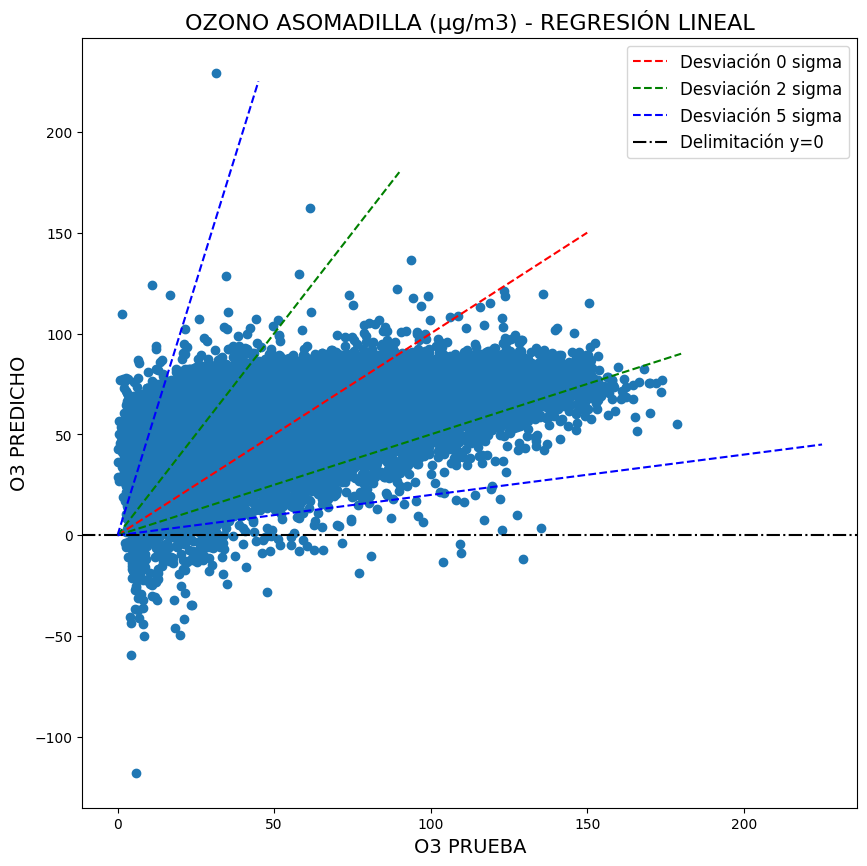

In [18]:
plt.figure(figsize=(10,10))


plt.title('OZONO ASOMADILLA (µg/m3) - REGRESIÓN LINEAL',fontsize=16)
plt.plot(y_test_global_asom.values,y_pred_global_asom,'o')

escala5=45
escala2=90

plt.plot(np.linspace(0,150,2000),np.linspace(0,150,2000),'r--', label='Desviación 0 sigma')

plt.plot(2*np.linspace(0,escala2,2000),np.linspace(0,escala2,2000),'g--',label='Desviación 2 sigma')
plt.plot(np.linspace(0,escala2,2000),2*np.linspace(0,escala2,2000),'g--',)

plt.plot(5*np.linspace(0,escala5,2000),np.linspace(0,escala5,2000),'b--',label='Desviación 5 sigma')
plt.plot(np.linspace(0,escala5,2000),5*np.linspace(0,escala5,2000),'b--')

plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')


plt.xlabel('O3 PRUEBA',fontsize=14)
plt.ylabel('O3 PREDICHO',fontsize=14)
plt.legend(fontsize=12)
plt.show()

Representación temporal

In [20]:
#Se reentrena para reintroducir la variable temporal.

Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)','FECHA_HORA']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)



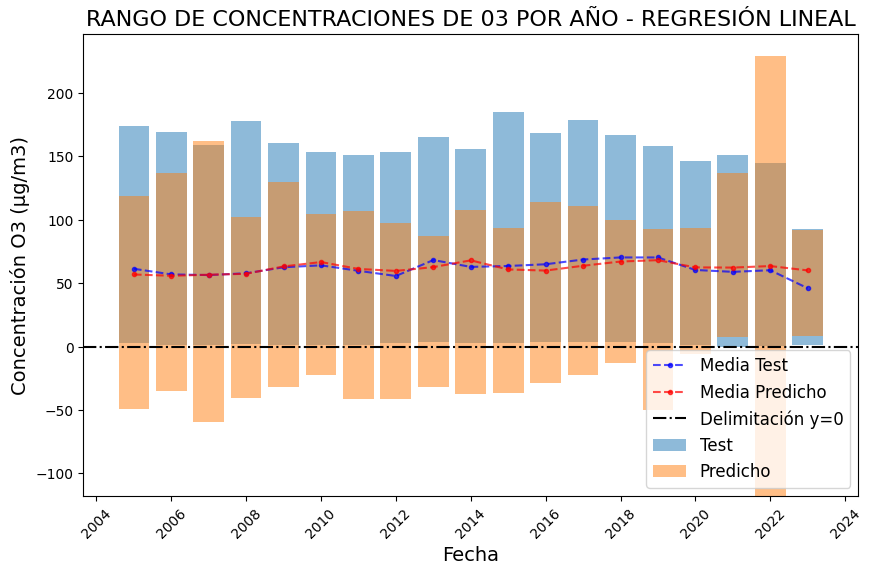

In [21]:
#Objetivo, hacer un diagrama de barras temporal por años que esté delimitado por valores máximos y mínimos dónde además aparezca la media. 

#Creación de dataframe vacío
Ozono = pd.DataFrame()

# Crear la columna de fechas a partir de los periodos de años (quedarse solo con los años en las fechas) además conmvertir a formato serie de panmdas.
Fecha = pd.Series(X_test_global_asom['FECHA_HORA'].dt.to_period('Y'))

# Extraer los valores de test y predicción
Test = y_test_global_asom['ASOMADILLA-O3 (µg/m3)']
Predicho = y_pred_global_asom

# Convertir Fecha a un DataFrame. Necesario para poder tenerlo todo en las mismas variables.
Fecha = Fecha.to_frame()

# Asignar el nombre las columnas al DataFrame Ozono
Ozono['FECHA'] = Fecha['FECHA_HORA']
Ozono['TEST'] = Test
Ozono['PREDICHO'] = Predicho

# Obtener únicamente las fechas únicas.
Fechas_sets = Ozono['FECHA'].unique()

# Inicializar listas auxiliares para las estadísticas
media = []
minin = []
maxin = []


# Calcular estadísticas para cada fecha recorrida en el test
for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['TEST'].mean())
    minin.append(aux['TEST'].min())
    maxin.append(aux['TEST'].max())

#Creación dataframe con todas las variables estadísticas.
Ozono2 = pd.DataFrame()
Ozono2['FECHA'] = Fechas_sets
Ozono2['MAX'] = maxin
Ozono2['MIN'] = minin
Ozono2['MEDIA'] = media

# Mismo proceso para datos de predicción.

media = []
minin = []
maxin = []

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['PREDICHO'].mean())
    minin.append(aux['PREDICHO'].min())
    maxin.append(aux['PREDICHO'].max())


Ozono3 = pd.DataFrame()
Ozono3['FECHA'] = Fechas_sets
Ozono3['MAX'] = maxin
Ozono3['MIN'] = minin
Ozono3['MEDIA'] = media


# Ordenar el DataFrame por orden de fecha
Ozono2 = Ozono2.sort_values(by='FECHA')
Ozono3 = Ozono3.sort_values(by='FECHA')

# Convertir las fechas de periodo a timestamp para graficar (se pierde al realizar los movimientos anteriores)
Ozono2['FECHA'] = Ozono2['FECHA'].dt.to_timestamp()
Ozono3['FECHA'] = Ozono3['FECHA'].dt.to_timestamp()












#Representación de barras y plot de medias.


plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['MAX']+abs(Ozono2['MIN']), bottom=Ozono2['MIN'], width=300,alpha=0.5, label='Test')
plt.xlabel('Fecha')
plt.ylabel('Concentración O3 (µg/m3)')
plt.title('RANGO DE CONCENTRACIONES DE 03 POR AÑO - REGRESIÓN LINEAL',fontsize=16)
plt.xticks(rotation=45)

plt.plot(Ozono2['FECHA'],Ozono2['MEDIA'], '.--', c='b', alpha=0.7, label='Media Test')



plt.bar(Ozono3['FECHA'], height=Ozono3['MAX']+abs(Ozono3['MIN']), bottom=Ozono3['MIN'], width=300,alpha=0.5, label='Predicho')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Concentración O3 (µg/m3)',fontsize=14)

plt.xticks(rotation=45)

plt.plot(Ozono3['FECHA'],Ozono3['MEDIA'], '.--',c='r', alpha=0.7 ,label='Media Predicho')



plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')

plt.legend(loc='best',fontsize=12)

plt.show()



Representación temporal de los errores

Valor MSE
ASOMADILLA-O3 (µg/m3)   -0.197611
dtype: float64
Valor R^2
0.2515927188497997
1    -0.265182
12   -0.257982
15   -0.165248
10   -0.184135
7    -0.219856
5    -0.191640
4    -0.226592
0    -0.178159
2    -0.173521
8    -0.157769
6    -0.221957
17   -0.180202
13   -0.257349
18   -0.177777
9    -0.203236
14   -0.235899
3    -0.274131
11   -0.188538
16   -0.144658
Name: ERROR, dtype: float64


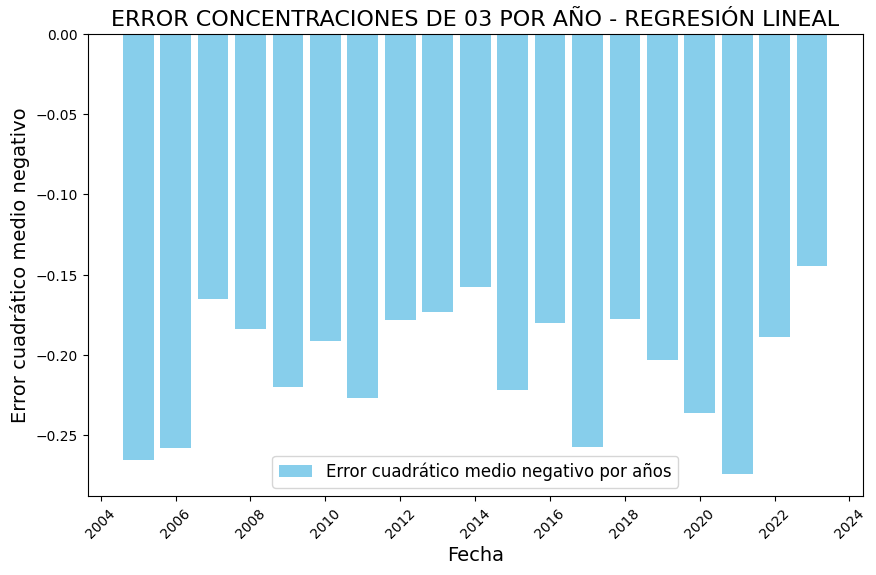

In [22]:
#importación del error cuadrático medio.

from sklearn.metrics import mean_squared_error as mse

#Obtención de mse negativo (nmse) normalizado.

print('Valor MSE')
print(-mse(y_test_global_asom,y_pred_global_asom)/y_test_global_asom.mean()**2)
print('Valor R^2')
print(r2(y_test_global_asom,y_pred_global_asom))

#Mismo procedimiento que anterior para crear dataframe para cada año del mse normalizado

error=[]

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    error.append(-mse(aux['TEST'],aux['PREDICHO'])/np.mean(aux['TEST'])**2)


Ozono2['ERROR']=error

#Comprobación todo correcto.
print(Ozono2['ERROR'])


#Representación figura

plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['ERROR'],  width=300, label='Error cuadrático medio negativo por años', color='skyblue')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Error cuadrático medio negativo',fontsize=14)
plt.title('ERROR CONCENTRACIONES DE 03 POR AÑO - REGRESIÓN LINEAL',fontsize=16)
plt.xticks(rotation=45)

plt.legend(fontsize=12)
plt.show()

#Descomentar si se desea guardar como png.

#plt.savefig('17_RES_LR_ERROR.png')





Random Forest no optimizado

Mismo procedimiento. Se reduce el número de comentarios.

In [23]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor as randomf

#Selección hiperparámetros base.
reg=randomf()

reg.fit(X_train_global_asom,y_train_global_asom);
y_pred_global_asom=reg.predict(X_test_global_asom)



C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


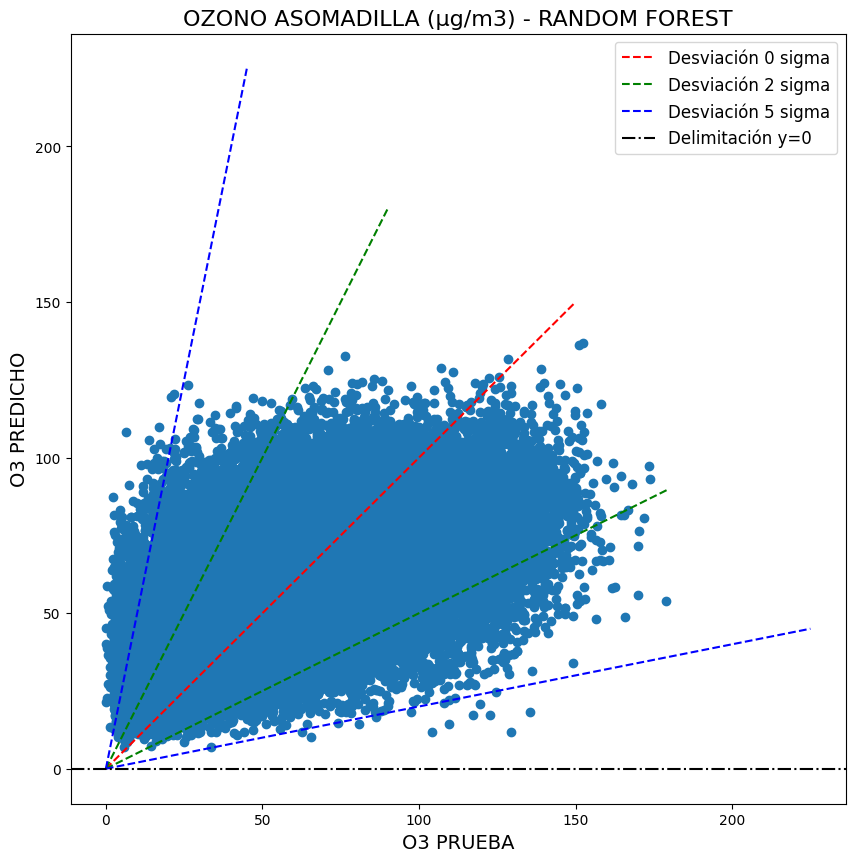

In [25]:
plt.figure(figsize=(10,10))


plt.title('OZONO ASOMADILLA (µg/m3) - RANDOM FOREST',fontsize=16)
plt.plot(y_test_global_asom.values,y_pred_global_asom,'o')

escala5=45
escala2=90

plt.plot(np.linspace(0,150,2000),np.linspace(0,150,2000),'r--', label='Desviación 0 sigma')

plt.plot(2*np.linspace(0,escala2,2000),np.linspace(0,escala2,2000),'g--',label='Desviación 2 sigma')
plt.plot(np.linspace(0,escala2,2000),2*np.linspace(0,escala2,2000),'g--',)

plt.plot(5*np.linspace(0,escala5,2000),np.linspace(0,escala5,2000),'b--',label='Desviación 5 sigma')
plt.plot(np.linspace(0,escala5,2000),5*np.linspace(0,escala5,2000),'b--')

plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')


plt.xlabel('O3 PRUEBA',fontsize=14)
plt.ylabel('O3 PREDICHO',fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [26]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)','FECHA_HORA']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)



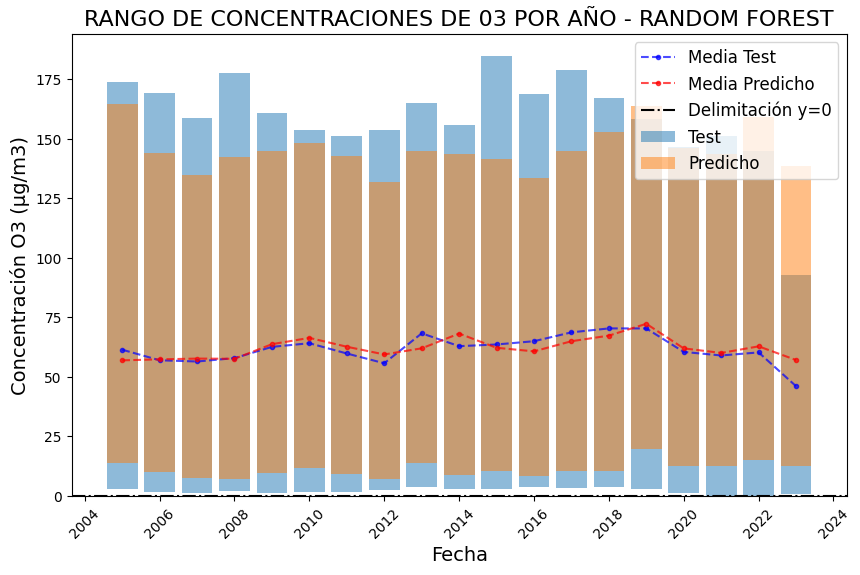

In [27]:

Ozono = pd.DataFrame()


Fecha = pd.Series(X_test_global_asom['FECHA_HORA'].dt.to_period('Y'))


Test = y_test_global_asom['ASOMADILLA-O3 (µg/m3)']
Predicho = y_pred_global_asom


Fecha = Fecha.to_frame()


Ozono['FECHA'] = Fecha['FECHA_HORA']
Ozono['TEST'] = Test
Ozono['PREDICHO'] = Predicho


Fechas_sets = Ozono['FECHA'].unique()


media = []
minin = []
maxin = []



for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['TEST'].mean())
    minin.append(aux['TEST'].min())
    maxin.append(aux['TEST'].max())



Ozono2 = pd.DataFrame()
Ozono2['FECHA'] = Fechas_sets
Ozono2['MAX'] = maxin
Ozono2['MIN'] = minin
Ozono2['MEDIA'] = media



media = []
minin = []
maxin = []

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['PREDICHO'].mean())
    minin.append(aux['PREDICHO'].min())
    maxin.append(aux['PREDICHO'].max())


Ozono3 = pd.DataFrame()
Ozono3['FECHA'] = Fechas_sets
Ozono3['MAX'] = maxin
Ozono3['MIN'] = minin
Ozono3['MEDIA'] = media


Ozono2 = Ozono2.sort_values(by='FECHA')
Ozono3 = Ozono3.sort_values(by='FECHA')


Ozono2['FECHA'] = Ozono2['FECHA'].dt.to_timestamp()
Ozono3['FECHA'] = Ozono3['FECHA'].dt.to_timestamp()




plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['MAX']+abs(Ozono2['MIN']), bottom=Ozono2['MIN'], width=300,alpha=0.5, label='Test')
plt.xlabel('Fecha')
plt.ylabel('Concentración O3 (µg/m3)')
plt.title('RANGO DE CONCENTRACIONES DE 03 POR AÑO - RANDOM FOREST',fontsize=16)
plt.xticks(rotation=45)

plt.plot(Ozono2['FECHA'],Ozono2['MEDIA'], '.--', c='b', alpha=0.7, label='Media Test')



plt.bar(Ozono3['FECHA'], height=Ozono3['MAX']+abs(Ozono3['MIN']), bottom=Ozono3['MIN'], width=300,alpha=0.5, label='Predicho')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Concentración O3 (µg/m3)',fontsize=14)
plt.xticks(rotation=45)

plt.plot(Ozono3['FECHA'],Ozono3['MEDIA'], '.--',c='r', alpha=0.7 ,label='Media Predicho')



plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')

plt.legend(loc='best',fontsize=12)

plt.show()


Valor MSE
ASOMADILLA-O3 (µg/m3)   -0.208373
dtype: float64
Valor R^2
0.2108374121152754
1    -0.289800
12   -0.257286
15   -0.175846
10   -0.200474
7    -0.245749
5    -0.197859
4    -0.229226
0    -0.191708
2    -0.188550
8    -0.161494
6    -0.239796
17   -0.178145
13   -0.244055
18   -0.186520
9    -0.224591
14   -0.240495
3    -0.289127
11   -0.204522
16   -0.160647
Name: ERROR, dtype: float64


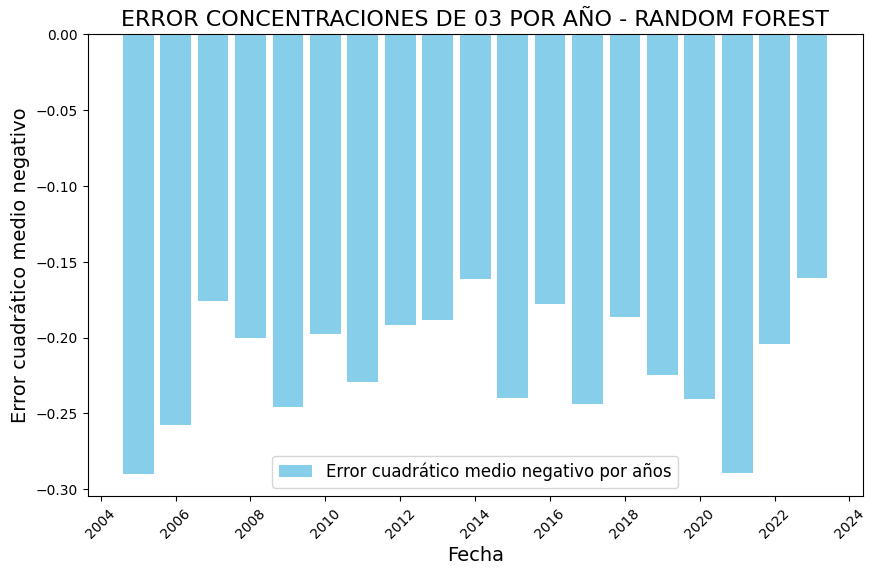

In [28]:
print('Valor MSE')
print(-mse(y_test_global_asom,y_pred_global_asom)/y_test_global_asom.mean()**2)
print('Valor R^2')
print(r2(y_test_global_asom,y_pred_global_asom))

error=[]

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    error.append(-mse(aux['TEST'],aux['PREDICHO'])/np.mean(aux['TEST'])**2)


Ozono2['ERROR']=error

print(Ozono2['ERROR'])



plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['ERROR'],  width=300, label='Error cuadrático medio negativo por años', color='skyblue')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Error cuadrático medio negativo',fontsize=14)
plt.title('ERROR CONCENTRACIONES DE 03 POR AÑO - RANDOM FOREST',fontsize=16)
plt.xticks(rotation=45)

plt.legend(fontsize=12)

plt.savefig('18_RES_RF_ERROR.png')

MLP regressor

In [29]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

In [30]:
#39s de ejecución tener cuidado al ejecutar
from sklearn.neural_network import MLPRegressor as MLP

reg=MLP(hidden_layer_sizes=(200,3))

reg.fit(X_train_global_asom,y_train_global_asom);
y_pred=reg.predict(X_test_global_asom)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


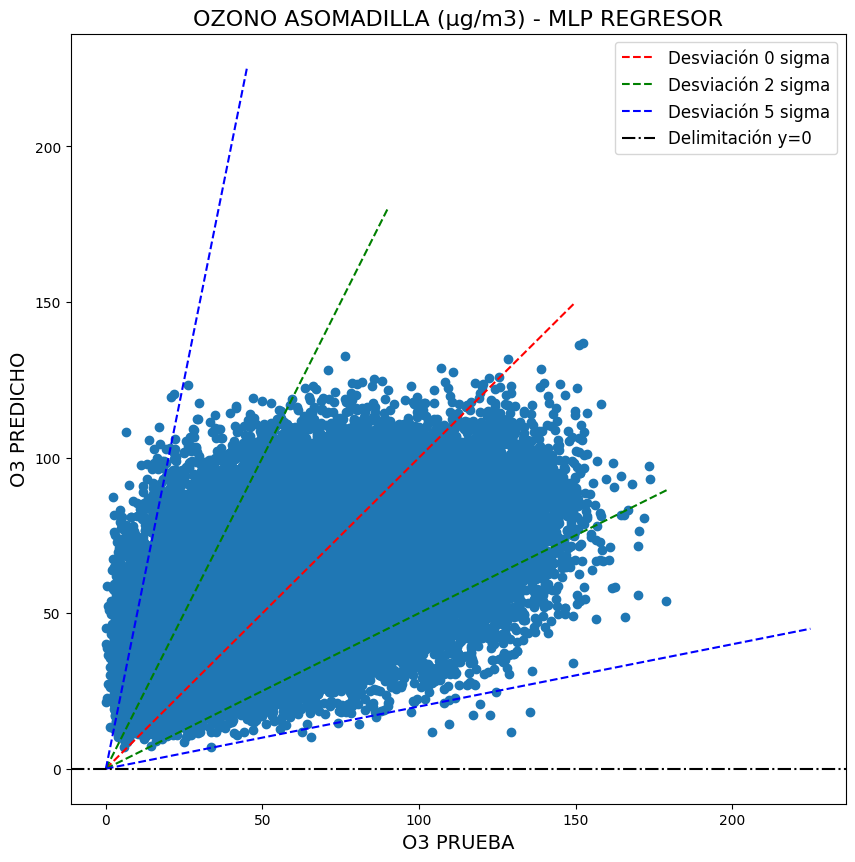

In [31]:
plt.figure(figsize=(10,10))


plt.title('OZONO ASOMADILLA (µg/m3) - MLP REGRESOR',fontsize=16)
plt.plot(y_test_global_asom.values,y_pred_global_asom,'o')

escala5=45
escala2=90

plt.plot(np.linspace(0,150,2000),np.linspace(0,150,2000),'r--', label='Desviación 0 sigma')

plt.plot(2*np.linspace(0,escala2,2000),np.linspace(0,escala2,2000),'g--',label='Desviación 2 sigma')
plt.plot(np.linspace(0,escala2,2000),2*np.linspace(0,escala2,2000),'g--',)

plt.plot(5*np.linspace(0,escala5,2000),np.linspace(0,escala5,2000),'b--',label='Desviación 5 sigma')
plt.plot(np.linspace(0,escala5,2000),5*np.linspace(0,escala5,2000),'b--')

plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')


plt.xlabel('O3 PRUEBA',fontsize=14)
plt.ylabel('O3 PREDICHO',fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [32]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)','FECHA_HORA']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

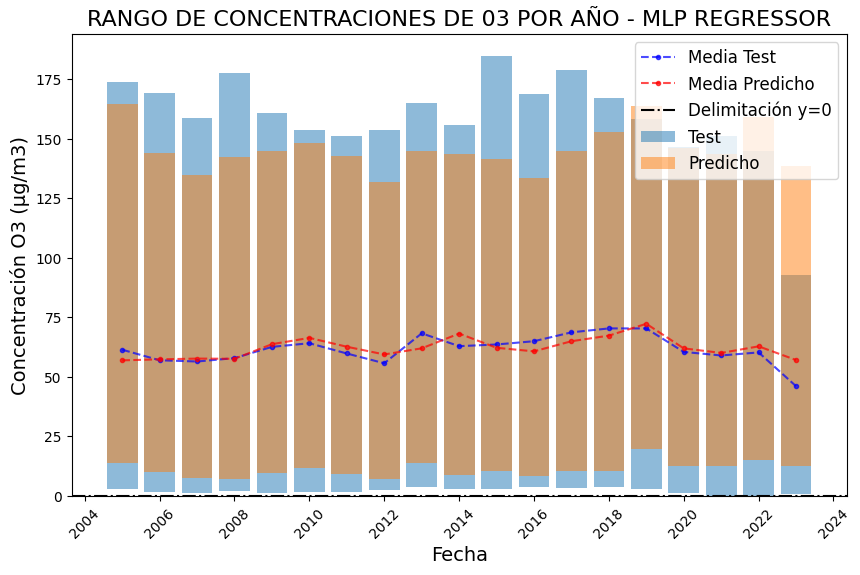

In [34]:


Ozono = pd.DataFrame()


Fecha = pd.Series(X_test_global_asom['FECHA_HORA'].dt.to_period('Y'))

Test = y_test_global_asom['ASOMADILLA-O3 (µg/m3)']
Predicho = y_pred_global_asom


Fecha = Fecha.to_frame()


Ozono['FECHA'] = Fecha['FECHA_HORA']
Ozono['TEST'] = Test
Ozono['PREDICHO'] = Predicho


Fechas_sets = Ozono['FECHA'].unique()


media = []
minin = []
maxin = []



for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['TEST'].mean())
    minin.append(aux['TEST'].min())
    maxin.append(aux['TEST'].max())



Ozono2 = pd.DataFrame()
Ozono2['FECHA'] = Fechas_sets
Ozono2['MAX'] = maxin
Ozono2['MIN'] = minin
Ozono2['MEDIA'] = media



media = []
minin = []
maxin = []

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['PREDICHO'].mean())
    minin.append(aux['PREDICHO'].min())
    maxin.append(aux['PREDICHO'].max())


Ozono3 = pd.DataFrame()
Ozono3['FECHA'] = Fechas_sets
Ozono3['MAX'] = maxin
Ozono3['MIN'] = minin
Ozono3['MEDIA'] = media


Ozono2 = Ozono2.sort_values(by='FECHA')
Ozono3 = Ozono3.sort_values(by='FECHA')


Ozono2['FECHA'] = Ozono2['FECHA'].dt.to_timestamp()
Ozono3['FECHA'] = Ozono3['FECHA'].dt.to_timestamp()






















plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['MAX']+abs(Ozono2['MIN']), bottom=Ozono2['MIN'], width=300,alpha=0.5, label='Test')
plt.xlabel('Fecha')
plt.ylabel('Concentración O3 (µg/m3)')
plt.title('RANGO DE CONCENTRACIONES DE 03 POR AÑO - MLP REGRESSOR',fontsize=16)
plt.xticks(rotation=45)

plt.plot(Ozono2['FECHA'],Ozono2['MEDIA'], '.--', c='b', alpha=0.7, label='Media Test')



plt.bar(Ozono3['FECHA'], height=Ozono3['MAX']+abs(Ozono3['MIN']), bottom=Ozono3['MIN'], width=300,alpha=0.5, label='Predicho')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Concentración O3 (µg/m3)',fontsize=14)

plt.xticks(rotation=45)

plt.plot(Ozono3['FECHA'],Ozono3['MEDIA'], '.--',c='r', alpha=0.7 ,label='Media Predicho')



plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')

plt.legend(loc='best',fontsize=12)

plt.show()






















Valor MSE
ASOMADILLA-O3 (µg/m3)   -0.208373
dtype: float64
Valor R^2
0.2108374121152754
1    -0.289800
12   -0.257286
15   -0.175846
10   -0.200474
7    -0.245749
5    -0.197859
4    -0.229226
0    -0.191708
2    -0.188550
8    -0.161494
6    -0.239796
17   -0.178145
13   -0.244055
18   -0.186520
9    -0.224591
14   -0.240495
3    -0.289127
11   -0.204522
16   -0.160647
Name: ERROR, dtype: float64


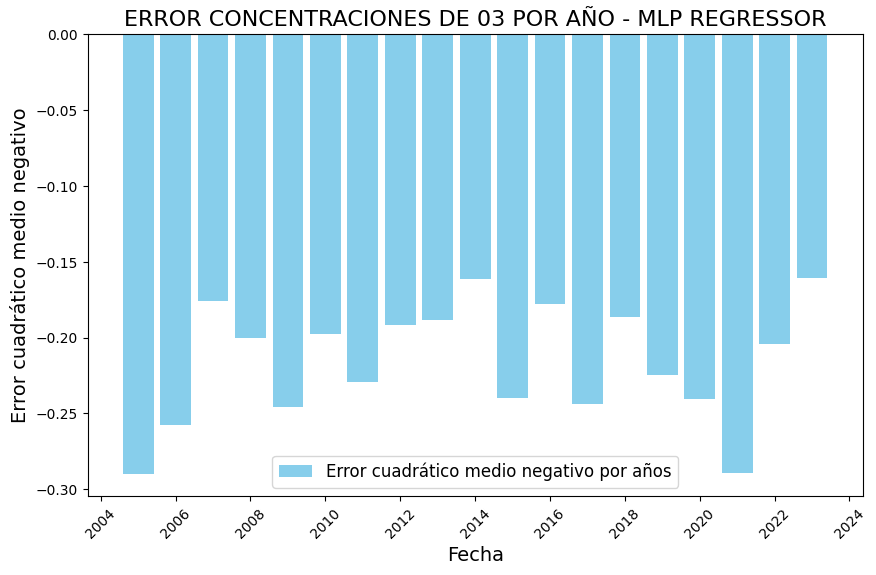

In [35]:
print('Valor MSE')
print(-mse(y_test_global_asom,y_pred_global_asom)/y_test_global_asom.mean()**2)
print('Valor R^2')
print(r2(y_test_global_asom,y_pred_global_asom))

error=[]

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    error.append(-mse(aux['TEST'],aux['PREDICHO'])/np.mean(aux['TEST'])**2)


Ozono2['ERROR']=error

print(Ozono2['ERROR'])



plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['ERROR'],  width=300, label='Error cuadrático medio negativo por años', color='skyblue')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Error cuadrático medio negativo',fontsize=14)
plt.title('ERROR CONCENTRACIONES DE 03 POR AÑO - MLP REGRESSOR',fontsize=16)
plt.xticks(rotation=45)

plt.legend(fontsize=12)

plt.savefig('19_RES_MLP_ERROR.png')

# Optimización de Modelos

Regresión lineal


El objetivo es conseguir acoplar una PCA, obtener las variables PCs, si procede reducir variables. Realizar regresión lineal, y recuperar variable Ozono. Desnormalizar.

PCA

In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [39]:

#Análisis puramente espacial. Cargamos de nuevo dataframe (si no da error).

dfglobal_asom=pd.read_csv('data.csv',usecols=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-O3 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)'])

data=dfglobal_asom.values #Coger los valores y se convierten en un array
df = pd.DataFrame(data) 
df.columns = dfglobal_asom.columns

dfglobal_asom.dropna(inplace=True, axis=0)

dfglobal_asom.describe()



,ASOMADILLA-NO2 (µg/m3),ASOMADILLA-O3 (µg/m3),ASOMADILLA-PM10 (µg/m3),ASOMADILLA-SO2 (µg/m3)
count,133975.000000,133975.000000,133975.000000,133975.000000
mean,16.027131,62.076832,26.290154,6.650605
std,13.087710,31.878614,23.247271,3.376463
min,0.000000,0.000000,0.000000,0.000000
25%,6.833300,37.833300,13.473302,3.833300
50%,12.166700,60.166700,21.280000,6.833300
75%,21.333300,83.333300,32.286628,8.833300
max,154.000000,191.500000,1116.533298,92.666700


In [40]:
#Escalado realizado a las variables, ncesarios para realizar una PCA

dfglobal_asom_scaled=preprocessing.scale(dfglobal_asom,axis=0)

#Creación dataframe, util más adelante.

DF_global_asom_scaled=pd.DataFrame(dfglobal_asom_scaled, columns=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-O3 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)'])

In [41]:
#Cargamos PCA, no parámetros, objetivo comprobar si puede reducirse dimensionalidad.
pca=PCA()
pca.fit(dfglobal_asom_scaled)

#Diagonalización
pca_data=pca.transform(dfglobal_asom_scaled)

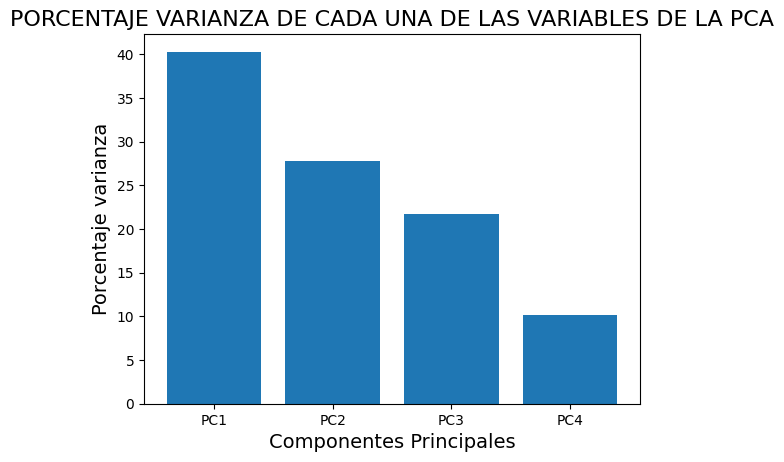

In [17]:
#Gráfica que permite ver el porcentaje de varianza que tiene cada variable PC. Error de 10% No puede reducirse dimensionalidad (mínimo debemos quedarnos 95% de datos)


per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC' +str(x) for x in range (1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xlabel('Componentes Principales',fontsize=14)
plt.ylabel('Porcentaje varianza',fontsize=14)

plt.title('PORCENTAJE VARIANZA DE CADA UNA DE LAS VARIABLES DE LA PCA',fontsize=16)
plt.show()


In [42]:
#Método más rápido que vuelve a realizar la pca y obtenemos los coeficientes lineales a los que llamaremos componentes
pca2=PCA()
#Valor de cada variable PC (PC 1, PC2, PC3, PC4)
X_pca2=pca2.fit_transform(dfglobal_asom_scaled)
componentes = pca2.components_
print(componentes)

[[ 0.69603876 -0.47699767  0.40311602  0.35426085]
 [-0.09337537  0.66916672  0.42148941  0.60485008]
 [-0.07060037  0.07714427  0.76822367 -0.63158272]
 [-0.70839726 -0.56456877  0.26396314  0.33129879]]


In [43]:
#Nombrarlos como indicado anteriormente
AsomadillaPCA=pd.DataFrame(X_pca2, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [44]:
#Objetivo: Ser capaz de tener separados en test y entrenamiento tanto las variables nuevas como las antiguas (necesarios para hacer la transformación)

#Selección de X las variables PC2,3,4. Predicción variable PC1.
Xcolumn_asom_PCA=['PCA2', 'PCA3', 'PCA4']
X_global_asom_PCA=AsomadillaPCA[Xcolumn_asom_PCA]
Ycolumn_asom_PCA=['PCA1']
Y_global_asom_PCA=AsomadillaPCA[Ycolumn_asom_PCA]

X_train_global_asom_PCA, X_test_global_asom_PCA, y_train_global_asom_PCA, y_test_global_asom_PCA = train_test_split(X_global_asom_PCA, Y_global_asom_PCA, test_size=0.3, random_state=42)

#Separación variables en test y entrenamiento. Tienen la misma semilla.

#Mismo para datos normalizados de variables antiguas (uso de dataframe anterior creado)

Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=DF_global_asom_scaled[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=DF_global_asom_scaled[Ycolumn_asom]

X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

In [47]:
#volver a cargar el modelo, realizar regresion.
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

#Realizar la regresión con variables PCs, obtenemos la predicción de PC1
reg.fit(X_train_global_asom,y_train_global_asom)
y_pred_global_asom_PCA=reg.predict(X_test_global_asom)


#Transformar predicción de PC1 a predicción de Ozono normalizado

y_pred_global_asom_desnorm = y_pred_global_asom_PCA.reshape(-1) - pd.Series.to_numpy((componentes[0, 0] * X_test_global_asom['ASOMADILLA-NO2 (µg/m3)'] +
                                          componentes[0, 2] * X_test_global_asom['ASOMADILLA-PM10 (µg/m3)'] +
                                          componentes[0, 3] * X_test_global_asom['ASOMADILLA-SO2 (µg/m3)']) / componentes[0, 1])


#Desnormalizar tanto predicción como test usando definición
y_pred_global_asom=y_pred_global_asom_desnorm * dfglobal_asom['ASOMADILLA-O3 (µg/m3)'].std()/10 + dfglobal_asom['ASOMADILLA-O3 (µg/m3)'].mean()/10

#print(y_test_global_asom_PCA)

y_test_global_asom=y_test_global_asom_PCA * dfglobal_asom['ASOMADILLA-O3 (µg/m3)'].std()/10+ dfglobal_asom['ASOMADILLA-O3 (µg/m3)'].mean()/10
#print(y_pred_global_asom)

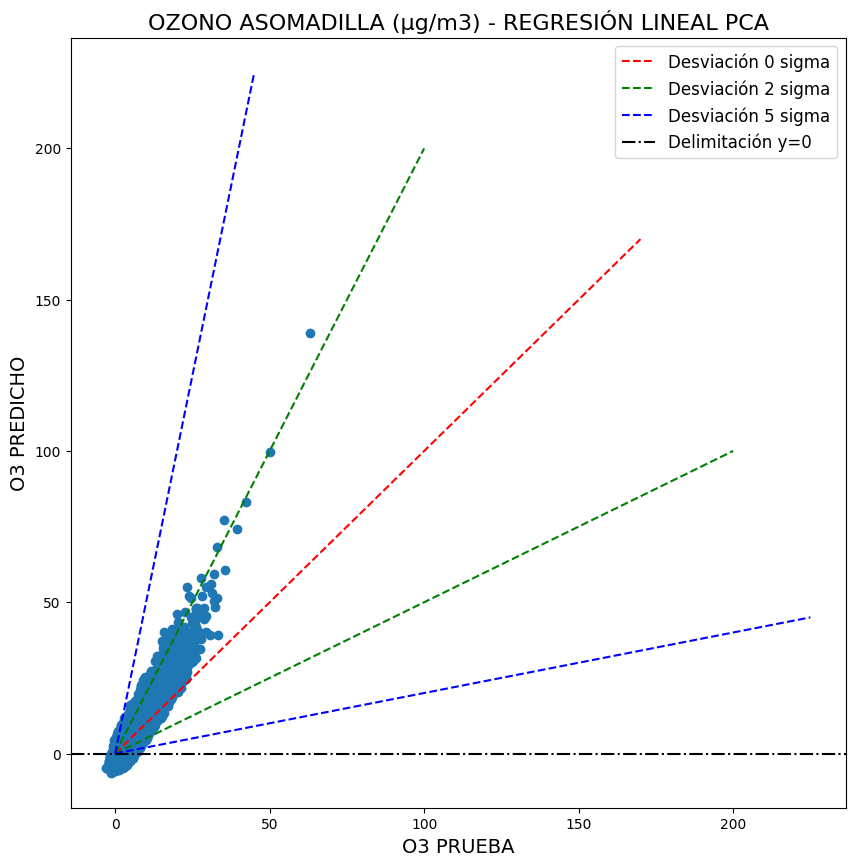

In [48]:
plt.figure(figsize=(10,10))


plt.title('OZONO ASOMADILLA (µg/m3) - REGRESIÓN LINEAL PCA',fontsize=16)
plt.plot(y_test_global_asom.values,y_pred_global_asom,'o')

escala5=45
escala2=100

plt.plot(np.linspace(0,170,2000),np.linspace(0,170,2000),'r--', label='Desviación 0 sigma')

plt.plot(2*np.linspace(0,escala2,2000),np.linspace(0,escala2,2000),'g--',label='Desviación 2 sigma')
plt.plot(np.linspace(0,escala2,2000),2*np.linspace(0,escala2,2000),'g--',)

plt.plot(5*np.linspace(0,escala5,2000),np.linspace(0,escala5,2000),'b--',label='Desviación 5 sigma')
plt.plot(np.linspace(0,escala5,2000),5*np.linspace(0,escala5,2000),'b--')

plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')



plt.xlabel('O3 PRUEBA',fontsize=14)
plt.ylabel('O3 PREDICHO',fontsize=14)
plt.legend(fontsize=12)
plt.show()

Realización crossvalidation, obtener una puntuación global resultados (método avanzado)

In [50]:
from sklearn.model_selection import cross_validate 
puntuaciones = cross_validate(reg, X_global_asom, Y_global_asom, cv = 3, scoring = 'neg_mean_squared_error')
print(np.mean(puntuaciones['test_score']))
print(np.std(puntuaciones['test_score']))

-0.765367278564204
0.03130118546991111


Random Forest

In [52]:
#Cargamos y reentrenamos
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]


X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

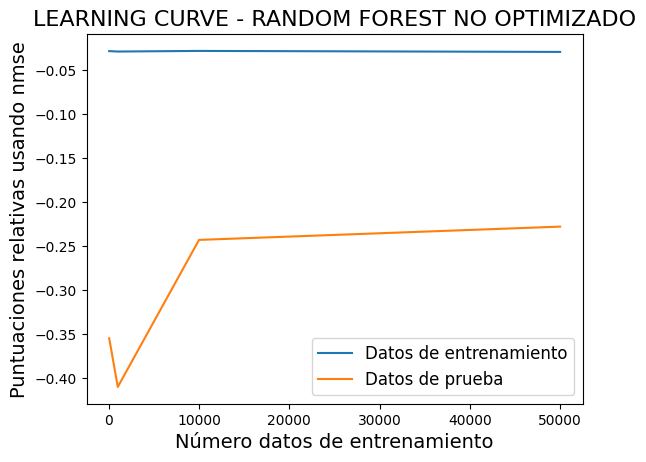

In [53]:
#Importante: Correr bajo conocimiento. Tiempo de computación 1m 50s


from sklearn.ensemble import RandomForestRegressor as randomf
reg=randomf()
from sklearn.model_selection import learning_curve


#Realizar las learning curve de modelo random forest sin optimizar.  Para datos de entrenamiento de 50,1000, 10000, 50000

train_sizes, train_scores, valid_scores = learning_curve( reg, X_global_asom/X_global_asom.mean(), Y_global_asom.values.ravel()/Y_global_asom.values.mean().ravel(), train_sizes=[50, 1000, 10000, 50000], cv=5, scoring = 'neg_mean_squared_error')

plt.figure()

plt.plot(train_sizes,train_scores.mean(axis=1),label='Datos de entrenamiento')

plt.plot(train_sizes,valid_scores.mean(axis=1),label='Datos de prueba')

plt.xlabel('Número datos de entrenamiento',fontsize=14)
plt.ylabel('Puntuaciones relativas usando nmse',fontsize=14)
plt.title('LEARNING CURVE - RANDOM FOREST NO OPTIMIZADO',fontsize=16)

plt.legend(fontsize=12)

plt.show()

In [29]:
#Esta casilla se ha usado como prueba. Es decir, se han ido cambiando los parámetros para obtener cual es la mejor combinación de parámetros. Si es posible no añadir más. 
# Alto coste computacional 4m 45 s No descomentar si se quiere reproducir en orden decreciente.

'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

parameters = {'n_estimators':[5, 10, 15,30,100], 'min_samples_split':[5,10]}
clf2 = GridSearchCV(reg, parameters, cv = KFold(n_splits = 5, shuffle = True)) 
clf2.fit(X_train_global_asom,y_train_global_asom.values.ravel())
print(clf2.best_score_) 
print(clf2.best_params_)

'''

0.25907198733681697
{'min_samples_split': 10, 'n_estimators': 100}


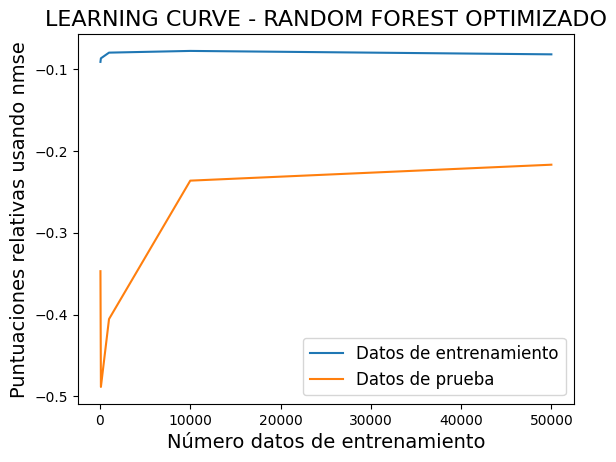

In [54]:
#Importante: Correr bajo conocimiento. Tiempo de computación 1m 40ss
from sklearn.ensemble import RandomForestRegressor as randomf

#Imposición parámetros optimizados.
reg=randomf(n_estimators=200, min_samples_split=10)


X_train_global_asom, X_test_global_asom, y_train_global_asom, y_test_global_asom = train_test_split(X_global_asom, Y_global_asom, test_size=0.3, random_state=42)

train_sizes, train_scores, valid_scores = learning_curve( reg, X_global_asom/X_global_asom.mean(), Y_global_asom.values.ravel()/Y_global_asom.values.mean().ravel(), train_sizes=[50, 100, 1000, 10000, 50000], cv=5, scoring = 'neg_mean_squared_error')

plt.figure()

plt.plot(train_sizes,train_scores.mean(axis=1),label='Datos de entrenamiento')

plt.plot(train_sizes,valid_scores.mean(axis=1),label='Datos de prueba')

plt.xlabel('Número datos de entrenamiento',fontsize=14)
plt.ylabel('Puntuaciones relativas usando nmse',fontsize=14)
plt.title('LEARNING CURVE - RANDOM FOREST OPTIMIZADO',fontsize=16)

plt.legend(fontsize=12)

plt.show()

In [41]:
#Importante: Correr bajo conocimiento. Tiempo de computación elevado.
from sklearn.model_selection import cross_validate 
puntuaciones = cross_validate(reg, X_global_asom, Y_global_asom, cv = 5, scoring = 'neg_mean_squared_error')
print(np.mean(puntuaciones['test_score']))
print(np.std(puntuaciones['test_score']))

#Puntuación del cross validation.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

-836.5017250805529
20.748968294079


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


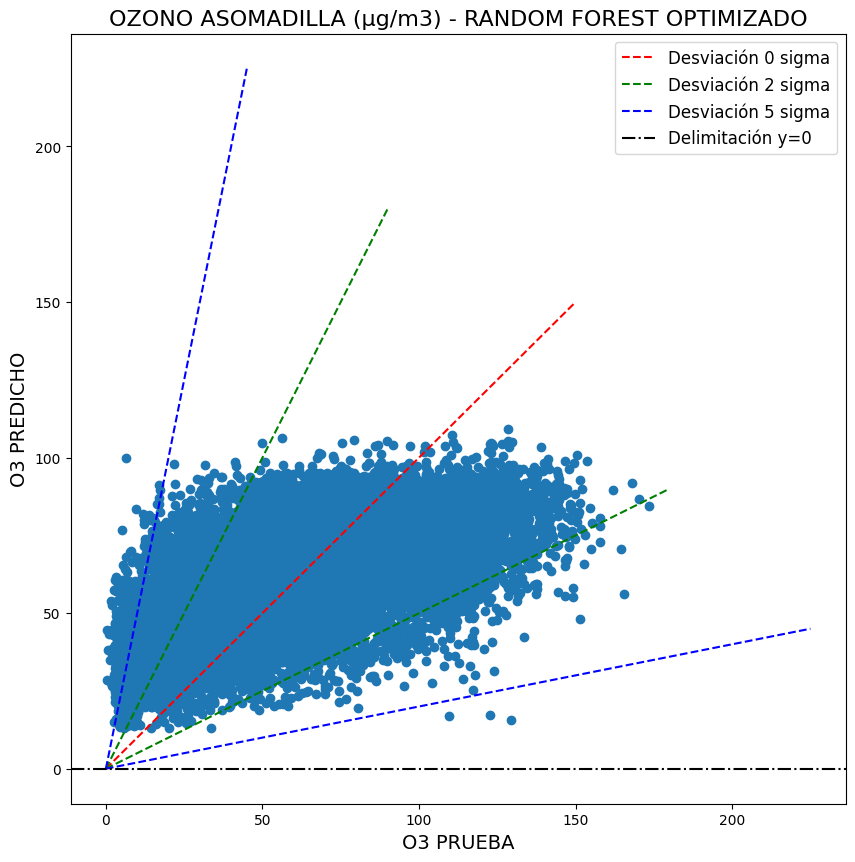

In [24]:
#Obtención de figura.
reg.fit(X_train_global_asom,y_train_global_asom);
y_pred_global_asom=reg.predict(X_test_global_asom)




plt.figure(figsize=(10,10))


plt.title('OZONO ASOMADILLA (µg/m3) - RANDOM FOREST OPTIMIZADO',fontsize=16)
plt.plot(y_test_global_asom.values,y_pred_global_asom,'o')

escala5=45
escala2=90

plt.plot(np.linspace(0,150,2000),np.linspace(0,150,2000),'r--', label='Desviación 0 sigma')

plt.plot(2*np.linspace(0,escala2,2000),np.linspace(0,escala2,2000),'g--',label='Desviación 2 sigma')
plt.plot(np.linspace(0,escala2,2000),2*np.linspace(0,escala2,2000),'g--',)

plt.plot(5*np.linspace(0,escala5,2000),np.linspace(0,escala5,2000),'b--',label='Desviación 5 sigma')
plt.plot(np.linspace(0,escala5,2000),5*np.linspace(0,escala5,2000),'b--')

plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')


plt.xlabel('O3 PRUEBA',fontsize=14)
plt.ylabel('O3 PREDICHO',fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [58]:
#Volver a cargar variables temporales y transformar a datetime

dfglobal_asom=pd.read_csv('data.csv',usecols=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-O3 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)','FECHA_HORA'])

data=dfglobal_asom.values #Coger los valores y se convierten en un array
df = pd.DataFrame(data) #dataframe
df.columns = dfglobal_asom.columns #título de las columnas que teniamos antes

dfglobal_asom.dropna(inplace=True, axis=0) #al volver a ponerlo en numpy te lo cambia a un NaN

dfglobal_asom.describe()

dfglobal_asom['FECHA_HORA']=pd.to_datetime(dfglobal_asom['FECHA_HORA'])

,FECHA_HORA,ASOMADILLA-NO2 (µg/m3),ASOMADILLA-O3 (µg/m3),ASOMADILLA-PM10 (µg/m3),ASOMADILLA-SO2 (µg/m3)
4312,2005-06-29 17:00:00,11.2000,108.1667,40.420000,7.0000
4313,2005-06-29 18:00:00,11.3333,112.1667,41.203302,6.6667
4314,2005-06-29 19:00:00,12.0000,113.6667,29.453302,7.1667
4315,2005-06-29 20:00:00,14.6667,115.0000,23.343302,6.3333
4316,2005-06-29 21:00:00,16.0000,114.8333,17.390000,6.3333
...,...,...,...,...,...
159187,2023-02-28 20:00:00,21.1667,65.0000,53.353298,4.1667
159188,2023-02-28 21:00:00,19.1667,58.6667,46.640000,3.1667
159189,2023-02-28 22:00:00,26.6667,40.5000,41.516702,3.0000
159190,2023-02-28 23:00:00,20.5000,43.6667,23.496702,3.0000


In [60]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

In [61]:
# Supongo que ya tienes las variables X_test_global_asom, y_test_global_asom, y_pred_global_asom definidas
# Ozono es un DataFrame vacío que luego será llenado
Ozono = pd.DataFrame()

# Crear la columna de fechas a partir de los periodos
Fecha = pd.Series(X_test_global_asom['FECHA_HORA'].dt.to_period('Y'))

# Extraer los valores de test y predicción
Test = y_test_global_asom['ASOMADILLA-O3 (µg/m3)']
Predicho = y_pred_global_asom

# Convertir Fecha a un DataFrame
Fecha = Fecha.to_frame()

# Asignar las columnas al DataFrame Ozono
Ozono['FECHA'] = Fecha['FECHA_HORA']
Ozono['TEST'] = Test
Ozono['PREDICHO'] = Predicho

# Obtener las fechas únicas
Fechas_sets = Ozono['FECHA'].unique()

# Inicializar listas para las estadísticas
media = []
minin = []
maxin = []


# Calcular estadísticas por cada fecha
for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['TEST'].mean())
    minin.append(aux['TEST'].min())
    maxin.append(aux['TEST'].max())


# Crear un nuevo DataFrame para almacenar las estadísticas
Ozono2 = pd.DataFrame()
Ozono2['FECHA'] = Fechas_sets
Ozono2['MAX'] = maxin
Ozono2['MIN'] = minin
Ozono2['MEDIA'] = media

# Calcular estadísticas por cada fecha

media = []
minin = []
maxin = []

for fecha in Fechas_sets:
    aux = Ozono[Ozono['FECHA'] == fecha]
    media.append(aux['PREDICHO'].mean())
    minin.append(aux['PREDICHO'].min())
    maxin.append(aux['PREDICHO'].max())


Ozono3 = pd.DataFrame()
Ozono3['FECHA'] = Fechas_sets
Ozono3['MAX'] = maxin
Ozono3['MIN'] = minin
Ozono3['MEDIA'] = media

# Ordenar el DataFrame por fecha
Ozono2 = Ozono2.sort_values(by='FECHA')
Ozono3 = Ozono3.sort_values(by='FECHA')

# Convertir las fechas de periodo a timestamp para graficar
Ozono2['FECHA'] = Ozono2['FECHA'].dt.to_timestamp()
Ozono3['FECHA'] = Ozono3['FECHA'].dt.to_timestamp()









plt.figure(figsize=(10, 6))
plt.bar(Ozono2['FECHA'], height=Ozono2['MAX']+abs(Ozono2['MIN']), bottom=Ozono2['MIN'], width=300,alpha=0.5, label='Test')
plt.xlabel('Fecha')
plt.ylabel('Concentración O3 (µg/m3)')
plt.title('RANGO DE CONCENTRACIONES DE 03 POR AÑO - RANDOM FOREST OPTIMIZADO',fontsize=16)
plt.xticks(rotation=45)

plt.plot(Ozono2['FECHA'],Ozono2['MEDIA'], '.--', c='b', alpha=0.7, label='Media Test')



plt.bar(Ozono3['FECHA'], height=Ozono3['MAX']+abs(Ozono3['MIN']), bottom=Ozono3['MIN'], width=300,alpha=0.5, label='Predicho')
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Concentración O3 (µg/m3)',fontsize=14)

plt.xticks(rotation=45)

plt.plot(Ozono3['FECHA'],Ozono3['MEDIA'], '.--',c='g', alpha=0.7 ,label='Media Predicho')



plt.axhline(0,0,200,c='k',ls='-.',label='Delimitación y=0')

plt.legend(loc='best',fontsize=12)

plt.show()


KeyError: 'FECHA_HORA'

In [3]:
from sklearn.neural_network import MLPRegressor as MLP

#Condiciones iniciales (ajustado como un 200x3)
reg=MLP(hidden_layer_sizes=(200,3))

In [4]:
Xcolumn_asom=['ASOMADILLA-NO2 (µg/m3)','ASOMADILLA-PM10 (µg/m3)','ASOMADILLA-SO2 (µg/m3)']
X_global_asom=dfglobal_asom[Xcolumn_asom]
Ycolumn_asom=['ASOMADILLA-O3 (µg/m3)']
Y_global_asom=dfglobal_asom[Ycolumn_asom]

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


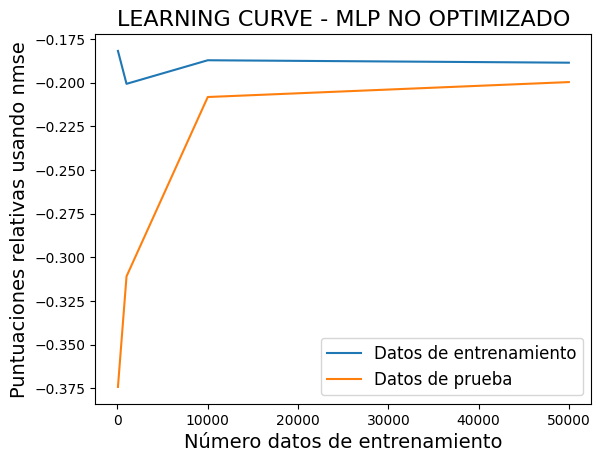

In [5]:
#alto coste computacional
from sklearn.model_selection import learning_curve




train_sizes, train_scores, valid_scores = learning_curve( reg, X_global_asom/X_global_asom.mean(), Y_global_asom.values.ravel()/Y_global_asom.values.mean().ravel(), train_sizes=[50, 1000, 10000, 50000], cv=5, scoring = 'neg_mean_squared_error')

plt.figure()

plt.plot(train_sizes,train_scores.mean(axis=1),label='Datos de entrenamiento')

plt.plot(train_sizes,valid_scores.mean(axis=1),label='Datos de prueba')

plt.xlabel('Número datos de entrenamiento',fontsize=14)
plt.ylabel('Puntuaciones relativas usando nmse',fontsize=14)
plt.title('LEARNING CURVE - MLP NO OPTIMIZADO',fontsize=16)

plt.legend(fontsize=12)

plt.show()





In [6]:
#Puntuación del cross validation.
from sklearn.model_selection import cross_validate 
puntuaciones = cross_validate(reg, X_global_asom, Y_global_asom, cv = 3, scoring = 'neg_mean_squared_error')
print(np.mean(puntuaciones['test_score']))
print(np.std(puntuaciones['test_score']))

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

-782.8043739386271
16.324734171815447


In [62]:
#Cambio manual, pueba a uno menos costoso computacionalmente

reg=MLP(hidden_layer_sizes=(75,5), activation='tanh')

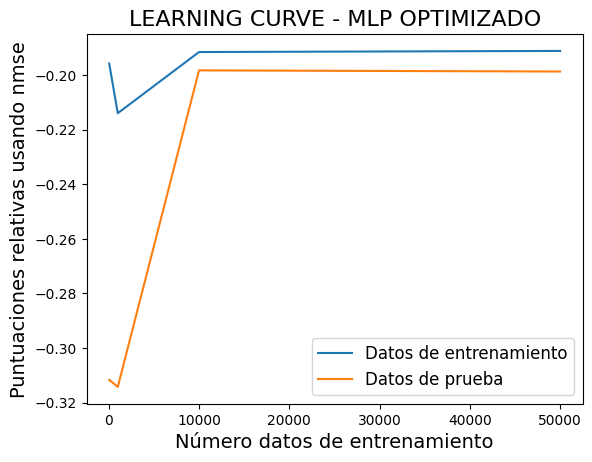

In [15]:
#Alto coste computacional


from sklearn.model_selection import learning_curve




train_sizes, train_scores, valid_scores = learning_curve( reg, X_global_asom/X_global_asom.mean(), Y_global_asom.values.ravel()/Y_global_asom.values.mean().ravel(), train_sizes=[50, 1000, 10000, 50000], cv=5, scoring = 'neg_mean_squared_error')

plt.figure()

plt.plot(train_sizes,train_scores.mean(axis=1),label='Datos de entrenamiento')

plt.plot(train_sizes,valid_scores.mean(axis=1),label='Datos de prueba')

plt.xlabel('Número datos de entrenamiento',fontsize=14)
plt.ylabel('Puntuaciones relativas usando nmse',fontsize=14)
plt.title('LEARNING CURVE - MLP OPTIMIZADO',fontsize=16)

plt.legend(fontsize=12)

plt.show()




In [16]:
#Puntuaciones
from sklearn.model_selection import cross_validate 
puntuaciones = cross_validate(reg, X_global_asom, Y_global_asom, cv = 3, scoring = 'neg_mean_squared_error')
print(np.mean(puntuaciones['test_score']))
print(np.std(puntuaciones['test_score']))

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

-786.5193910403631
38.64812180822625
